# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [2]:
df = pd.read_csv('car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# Get info about data types and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Number of null values in each columns

In [4]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

# Data Cleaning

In [5]:
# Convert 'max_power' to numeric
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Fill missing values by group
df['mileage(km/ltr/kg)'] = df.groupby('fuel')['mileage(km/ltr/kg)'].transform(lambda x: x.fillna(x.median()))
df['engine'] = df.groupby('fuel')['engine'].transform(lambda x: x.fillna(x.median()))
df['max_power'] = df.groupby('fuel')['max_power'].transform(lambda x: x.fillna(x.median()))
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


# EDA

In [14]:
df.describe(include = 'all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Brand,Model
count,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,8128.000000,8128.000000,8128.000000,8128.000000,8128,8128
unique,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,32,2058
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,Maruti,Swift Dzire VDI
freq,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN,2448,129
mean,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.421619,1455.114296,91.322329,5.405389,NaN,NaN
std,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,3.985921,498.123189,35.376354,0.948874,NaN,NaN
min,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000,NaN,NaN
25%,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.800000,1197.000000,68.100000,5.000000,NaN,NaN
50%,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,82.000000,5.000000,NaN,NaN
75%,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.300000,1582.000000,101.250000,5.000000,NaN,NaN


In [8]:
#Separating Brand name and model name and dropping the name column
df['Brand'] = df['name'].str.split().str[0]
df['Model'] = df['name'].str.split().str[1:].str.join(' ')
df.drop(columns = ['name'], inplace=True)
df.sample()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Brand,Model
7413,2018,690000,13000,Petrol,Individual,Manual,First Owner,20.4,1194.0,94.93,5.0,Ford,Aspire Trend Plus


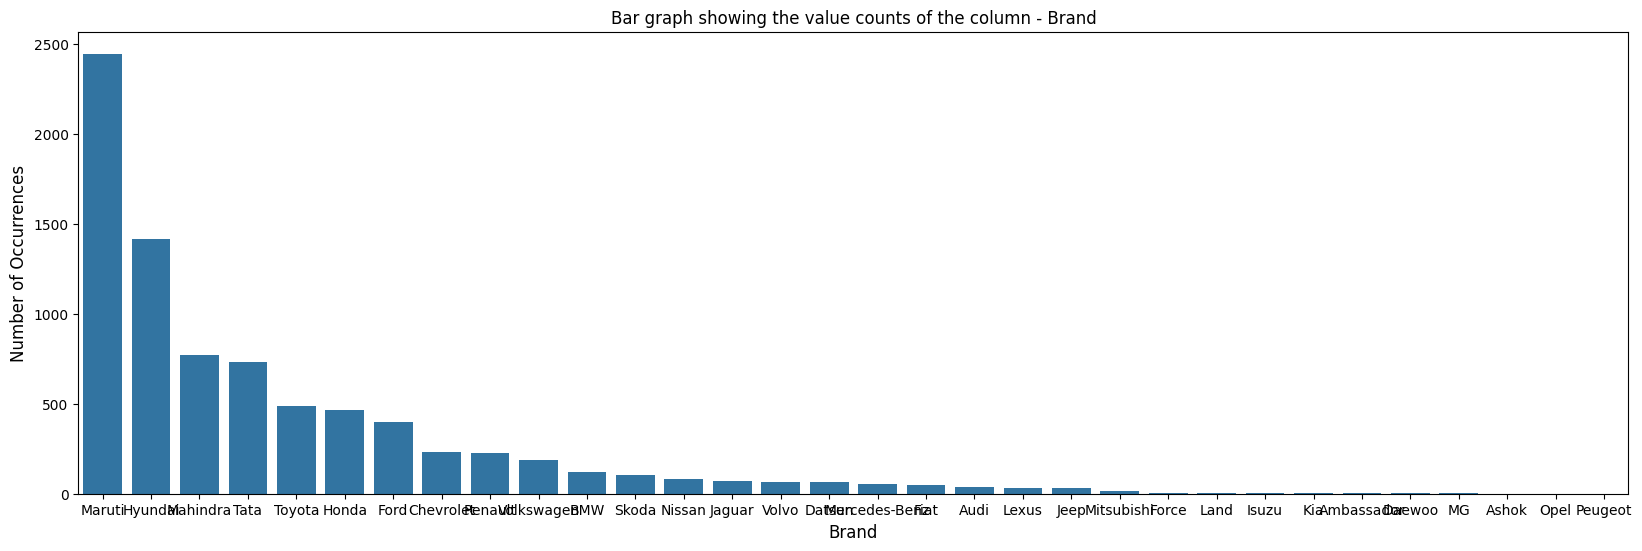

In [20]:
brand_count = df['Brand'].value_counts()
plt.figure(figsize = (20, 6))
sns.barplot(x = brand_count.index, y = brand_count.values)
plt.title('Bar graph showing the value counts of the column - Brand')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Brand', fontsize = 12)
plt.show()

In [ ]:
#the number of occurences across brands are not uniformly distributed

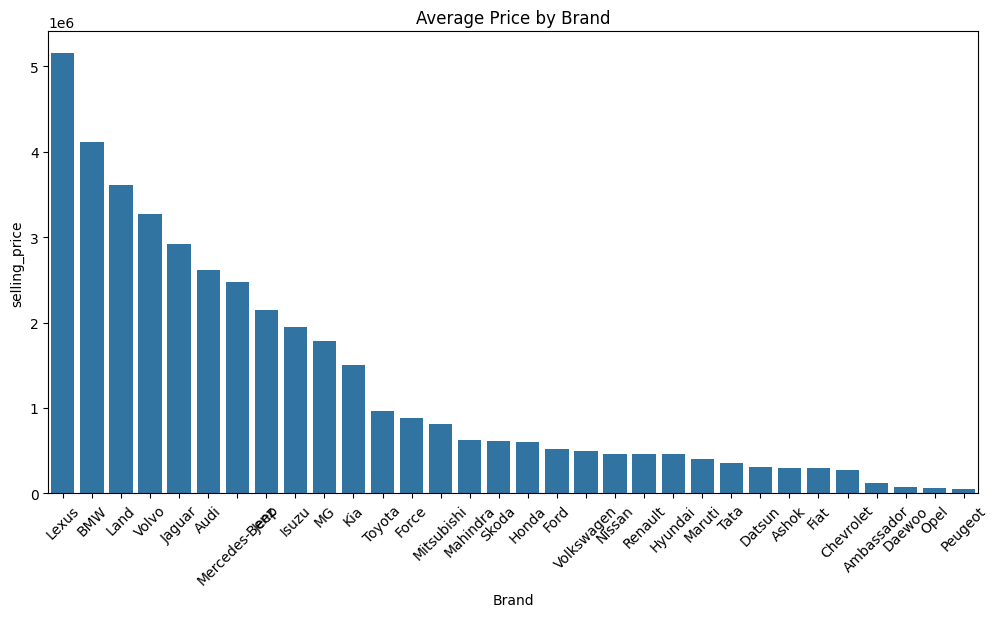

In [11]:
brand_avg = df.groupby('Brand')['selling_price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='selling_price', data=brand_avg)
plt.xticks(rotation=45)
plt.title('Average Price by Brand')
plt.show()

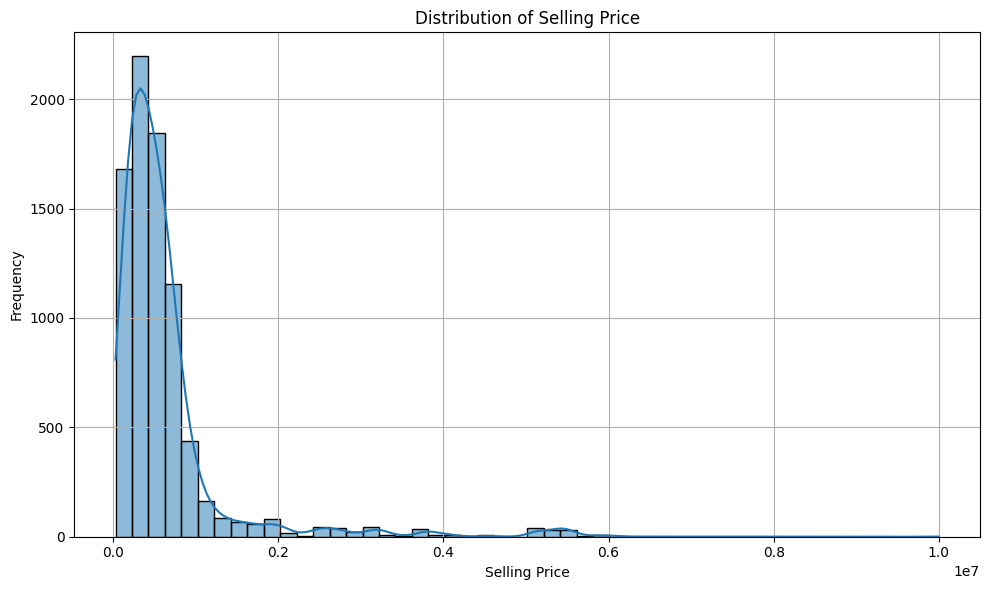

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=50)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

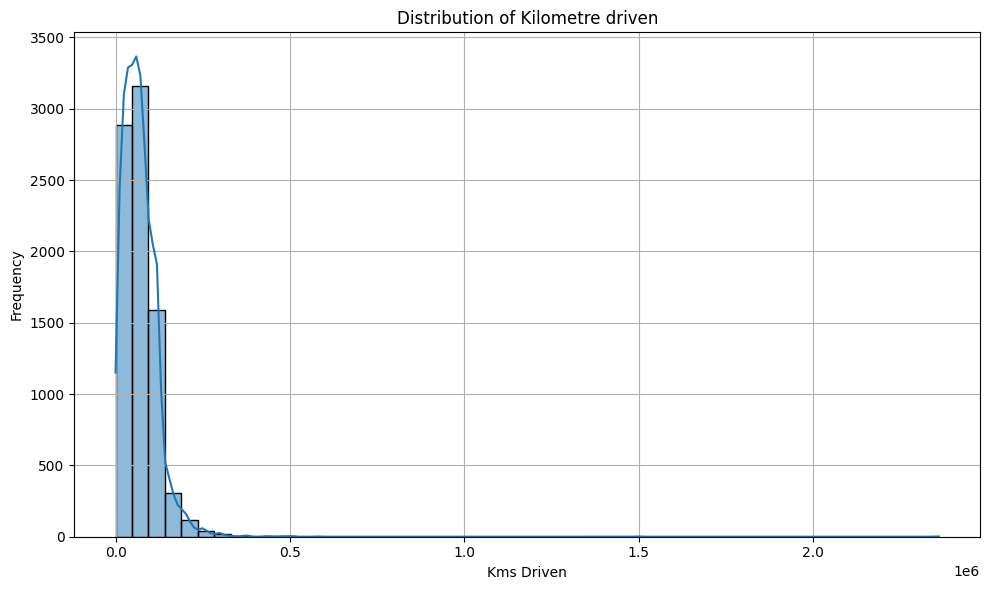

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], kde=True, bins=50)
plt.title('Distribution of Kilometre driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

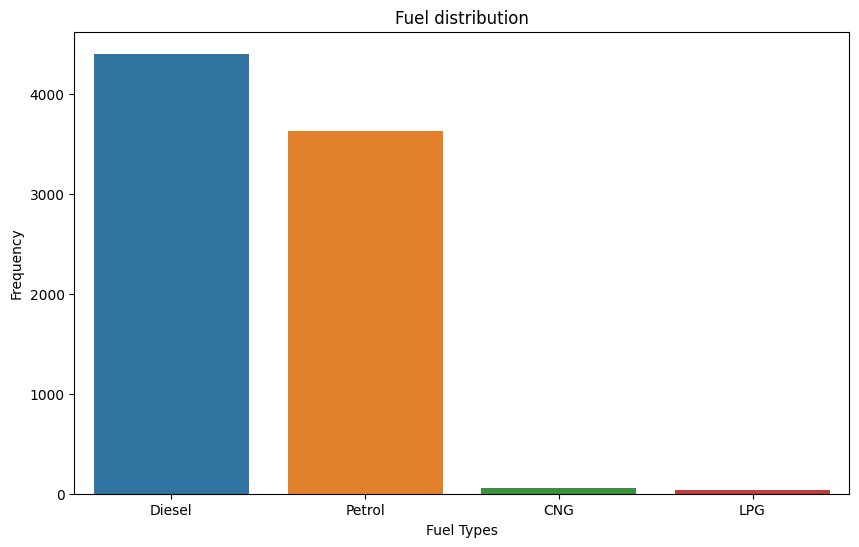

In [46]:
#Fuel type distribution
fuel_count = df['fuel'].value_counts().reset_index()
fuel_count.columns = ['fuel_type','count']
plt.figure(figsize=(10,6))
sns.barplot(data = fuel_count, x = 'fuel_type', y = 'count', hue = 'fuel_type', legend = False)
plt.title('Fuel distribution')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.show()

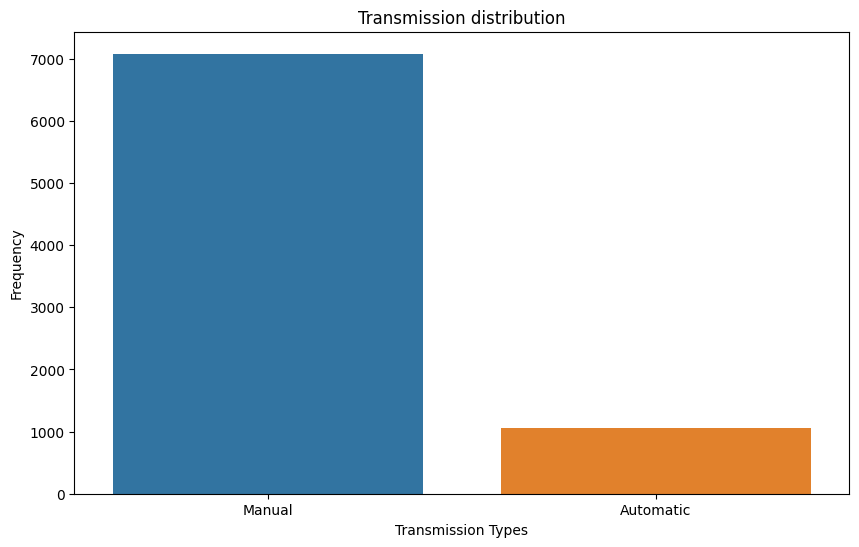

In [47]:
transmission_count = df['transmission'].value_counts().reset_index()
transmission_count.columns = ['transmission_type','count']
plt.figure(figsize=(10,6))
sns.barplot(data = transmission_count, x = 'transmission_type', y = 'count', hue = 'transmission_type', legend = False)
plt.title('Transmission distribution')
plt.xlabel('Transmission Types')
plt.ylabel('Frequency')
plt.show()

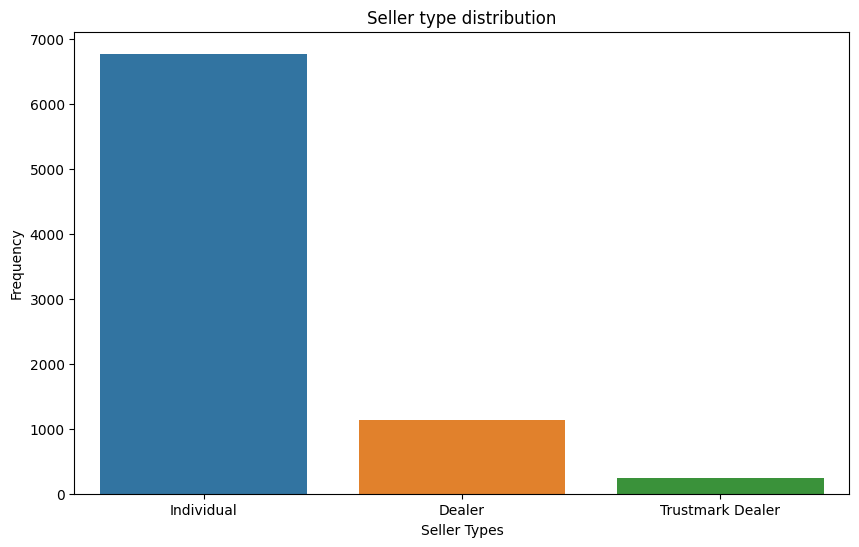

In [49]:
#Seller type distribution
seller_count = df['seller_type'].value_counts().reset_index()
seller_count.columns = ['seller_type','count']
plt.figure(figsize=(10,6))
sns.barplot(data = seller_count, x = 'seller_type', y = 'count', hue = 'seller_type', legend = False)
plt.title('Seller type distribution')
plt.xlabel('Seller Types')
plt.ylabel('Frequency')
plt.show()

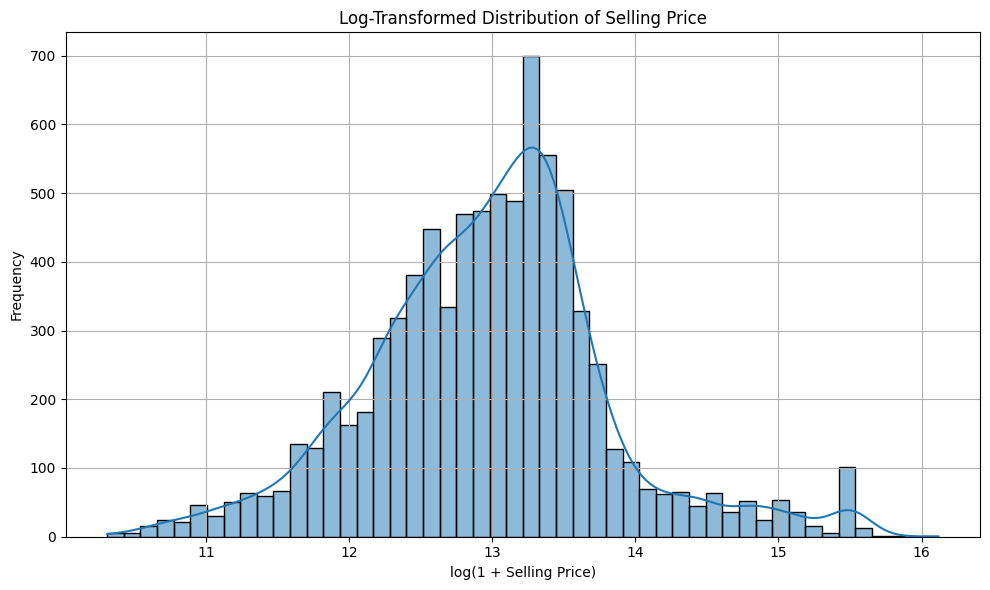

In [27]:
df['log_selling_price'] = np.log1p(df['selling_price'])
# Plot the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_selling_price'], kde=True, bins=50)
plt.title('Log-Transformed Distribution of Selling Price')
plt.xlabel('log(1 + Selling Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()